# Analysis for Question 3
Cleaning and analysing the EventRatings and PastEvents CSVs, that was scraped prior.

We will be looking to first produce some visualisations of every player in the dataset. I then will move on to determine if younger players, perform better than older players, by making two subsets of the dataset and plotting them both on a scatter plot. I will then move on to finding the most talented youth players.

I first will have to clean both CSVs to make them into dataframes that can be used. I will then intend to drop any events in the larger EventRating CSV that are not in the PastEvents CSV.

In [1]:
#Importing relevant libraries
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.patheffects as pe

In [2]:
# Reading in my csv file
dfRatings = pd.read_csv('EVENT_RATINGS.csv')
dfRatings

,Player,Event,Rating
0,ZywOo,ESL One Cologne 2019 Europe Closed Qualifier,1.24
1,ZywOo,ESEA MDL Season 31 Europe,1.17
2,ZywOo,ECS Season 7 Europe Week 3,1.44
3,ZywOo,Charleroi Esports,1.32
4,ZywOo,StarSeries i-League Season 7,1.22
5,ZywOo,ECS Season 7 Europe Week 2,1.38
6,ZywOo,ECS Season 7 Europe Pinnacle Cup,1.30
7,ZywOo,IEM Katowice 2019,1.14
8,ZywOo,IEM Katowice 2019 Main Qualifier,1.33
9,ZywOo,WePlay! Lock and Load,1.53


In [3]:
# Reading in my csv file
dfEvents = pd.read_csv('PAST_EVENTS.csv')
dfEvents

,Event
0,Grosvenor CS:GO Championship Season 2
1,WePlay! Forge of Masters Season 1 Finals
2,IEM Sydney 2019
3,The Elite Championship Series 2019
4,LOOT.BET Season 2
5,CSL 2019 Spring Finals
6,Lotto Cup Winners' Cup
7,T.O. Spawn
8,ECS Season 7 North America Week 3
9,ECS Season 7 Europe Week 3


## Data Cleaning

First I put all the Events in the PastEvents CSV into a list.

In [4]:
eventList = dfEvents["Event"].tolist()
eventList

['Grosvenor CS:GO Championship Season 2',
 'WePlay! Forge of Masters Season 1 Finals',
 'IEM Sydney 2019',
 'The Elite Championship Series 2019',
 'LOOT.BET Season 2',
 'CSL 2019 Spring Finals',
 "Lotto Cup Winners' Cup",
 'T.O. Spawn',
 'ECS Season 7 North America Week 3',
 'ECS Season 7 Europe Week 3',
 'Hungarian National Esport Championship Season 1 Finals',
 'Insomnia64',
 'DreamHack Open Rio 2019',
 'CSadria Clan Championship Season 3 Finals',
 'Copenhagen Games 2019',
 'Copenhagen Games 2019 Female',
 'Asian Development League 2019 - Season 1',
 'ESEA Rank S Combine',
 'Charleroi Esports',
 'Baltic Esports League Season 2 Finals',
 'BLAST Pro Series Miami 2019',
 'LOOT.BET HotShot Series Season 2',
 'Cobx Masters',
 'StarSeries i-League Season 7',
 'ESEA Advanced Season 30 Europe',
 'ESL Meisterschaft Spring 2019 Finals',
 'LPL Pro League Season 1',
 'ESEA MDL Season 30 Europe',
 'ESEA Advanced Season 30 North America',
 'ESEA MDL Season 30 North America',
 'Iskandar Investment 

I made a table of all players and events they played in from the EventRating CSV, which gave me a huge table with a lot of nan values. Then using the eventList just created, all events in the table not in the list were dropped.

In [5]:
dfRate = dfRatings.pivot_table(index=['Player'], columns='Event', values='Rating')
dfRate

Event,2016 D-Fire Lan Final,4Gamers CS:GO Masters,4Gamers CS:GO Masters Porto,91Lounge Cup #1,99Damage Arena #1,99Damage Arena #12,99Damage Arena #13,99Damage Arena #14,99Damage Arena #15,99Damage Arena #16,...,iiyama CS:GO HomeMasters #3 Finals,interLAN 2017,interLAN Vol. 6,mmbets.net Stars Challenge South America,owayo Masters I,xfunction Challenge,xfunction Champions Series 2016,xfunction Masters 2016,xfunction Masters Season III,xfunction Masters by hitbox
Player,,,,,,,,,,,,,,,,,,,,,
0i,NaN,NaN,NaN,0.67,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1uke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AERO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78,NaN,0.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.94,NaN,NaN
ANDROID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANGE1,NaN,NaN,NaN,NaN,NaN,NaN,0.98,NaN,1.05,1.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Only keeps columns are in event list
dfRate = dfRate.loc[:, dfRate.columns.isin(eventList)]
dfRate

Event,2016 D-Fire Lan Final,4Gamers CS:GO Masters,4Gamers CS:GO Masters Porto,91Lounge Cup #1,99Damage League Season 10,99Damage League Season 3,99Damage League Season 4,99Damage League Season 5,99Damage League Season 6,99Damage League Season 7,...,iBUYPOWER Invitational Spring 2017,iBUYPOWER Invitational Spring 2018,iBUYPOWER Invitational Summer 2016,iBUYPOWER Masters 2016,iBUYPOWER Masters 2017,iBUYPOWER Masters 2019,iGame.com Nordic Invitational,iGame.com Nordic Invitational 2,iGame.com Winter Invitational,xfunction Masters 2016
Player,,,,,,,,,,,,,,,,,,,,,
0i,NaN,NaN,NaN,0.67,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1uke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AERO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.94
ANDROID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.90,1.03,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANGE1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.96,0.94,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drops columns that have no value so to order list by date, need column list
cleanList = dfRate.columns.tolist()
cleanList

['2016 D-Fire Lan Final',
 '4Gamers CS:GO Masters',
 '4Gamers CS:GO Masters Porto',
 '91Lounge Cup #1',
 '99Damage League Season 10',
 '99Damage League Season 3',
 '99Damage League Season 4',
 '99Damage League Season 5',
 '99Damage League Season 6',
 '99Damage League Season 7',
 '99Damage League Season 8',
 '99Damage League Season 9',
 'A1 Adria League Season 2 Finals',
 'ACL Melbourne 2015',
 'ALTEL Cyber Games',
 'AMD Sapphire CS:GO Invitational',
 'AOC CyberGamer Premier League Championship 2017',
 'AOC CyberGamer Premier League Spring 2017 Finals',
 'AOC CyberGamer Premier League Spring 2018 Finals',
 'AOC CyberGamer Premier League Winter 2017 Finals',
 'AOC CyberGamer Premier League Winter 2018 Finals',
 'ASUS ROG GameXpo 2016',
 'ASUS ROG Nordic Challenge',
 'ASUS ROG Summer 2014',
 'ASUS ROG Summer 2016',
 'ASUS ROG Winter 2015',
 'ASUS ROG Winter 2019',
 'Acer A-Split Invitational powered by Intel',
 'Acer CyberGamer Premier League Autumn 2017 Finals',
 'Acer Predator Masters p

In [8]:
# Only keep events from event list that are in cleanList
finalEvents = [x for x in eventList if x in cleanList]
finalEvents

['Grosvenor CS:GO Championship Season 2',
 'WePlay! Forge of Masters Season 1 Finals',
 'IEM Sydney 2019',
 'The Elite Championship Series 2019',
 'LOOT.BET Season 2',
 "Lotto Cup Winners' Cup",
 'T.O. Spawn',
 'ECS Season 7 North America Week 3',
 'ECS Season 7 Europe Week 3',
 'Hungarian National Esport Championship Season 1 Finals',
 'Insomnia64',
 'DreamHack Open Rio 2019',
 'Copenhagen Games 2019',
 'Asian Development League 2019 - Season 1',
 'ESEA Rank S Combine',
 'Charleroi Esports',
 'Baltic Esports League Season 2 Finals',
 'BLAST Pro Series Miami 2019',
 'LOOT.BET HotShot Series Season 2',
 'Cobx Masters',
 'StarSeries i-League Season 7',
 'ESEA Advanced Season 30 Europe',
 'ESL Meisterschaft Spring 2019 Finals',
 'LPL Pro League Season 1',
 'ESEA MDL Season 30 Europe',
 'ESEA Advanced Season 30 North America',
 'ESEA MDL Season 30 North America',
 'Iskandar Investment Esports Carnival 2019',
 'ESEA MDL Season 30 North America All-Star Game',
 'ESL Premiership Spring 2019 F

In [9]:
# Now have cleaned list of events by date, use list to order columns
dfRate = dfRate[finalEvents]
dfRate = dfRate.iloc[:, ::-1]
dfRate

Event,DreamHack Valencia 2012,ESWC 2012,DreamHack Winter 2012,AMD Sapphire CS:GO Invitational,THOR Open 2012,NorthCon 2012,SLTV StarSeries IV,Mad Catz Vienna,TECHLABS Cup 2013,ESL Pro Series Spain X,...,Hungarian National Esport Championship Season 1 Finals,ECS Season 7 Europe Week 3,ECS Season 7 North America Week 3,T.O. Spawn,Lotto Cup Winners' Cup,LOOT.BET Season 2,The Elite Championship Series 2019,IEM Sydney 2019,WePlay! Forge of Masters Season 1 Finals,Grosvenor CS:GO Championship Season 2
Player,,,,,,,,,,,,,,,,,,,,,
0i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1uke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AERO,NaN,NaN,NaN,0.93,NaN,NaN,0.84,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANDROID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANGE1,NaN,NaN,NaN,NaN,NaN,NaN,1.17,1.0,1.17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88,NaN
AZK,NaN,NaN,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.81,NaN,NaN


After changing the order of columns, I have a table of all players and their past event ratings from only important events, in chronological order.

## Zywoo

Using the dfRate, and the dataframes acquired in 'Analysis-Q3-PlayerStats', I selected the players who I will use to predict ZywOo's future ratings. To do this, I selected events where at least 2 of the 5 players played, and got an average of their rating in that event. I then added all of these ratings to a dataframe called dfMeanZywoo, and drop the event name. 

In [10]:
dfTest = dfRate
dfTest = dfTest.reset_index(level=("Player"))
dfMeanZywoo = dfTest[(dfTest["Player"]=="s1mple") |  (dfTest["Player"]=="NiKo")| (dfTest["Player"]=="XANTARES")| (dfTest["Player"]=="device")| (dfTest["Player"]=="coldzera")]
dfMeanZywoo = dfMeanZywoo.dropna(axis=1 , thresh=2)
dfMeanZywoo = dfMeanZywoo.mean()
dfMeanZywoo = dfMeanZywoo.reset_index(level=("Event"))
dfMeanZywoo.columns = ['Event', 'Rating']
dfMeanZywoo = dfMeanZywoo.drop(['Event'],axis = 1)
dfMeanZywoo

,Rating
0,1.190000
1,1.190000
2,1.075000
3,1.326667
4,1.160000
5,1.165000
6,1.106667
7,1.220000
8,1.105000
9,1.055000


I then got all of ZywOo's own past event scores from the large dataframe, and transposed the dataframe, again dropping event and player name. I use this number to later show where the prediction begins on the graph. 

In [11]:
dfZywoo = dfTest[(dfTest["Player"]=="ZywOo") ]
dfZywoo = dfZywoo.dropna(axis=1 , thresh=1)
dfZywooT = dfZywoo.T
dfZywooT = dfZywooT.drop(['Player'], axis= 0)
dfZywooT = dfZywooT.reset_index(level=("Event"))
dfZywooT.columns = ['Event', 'Rating']
dfZywooT = dfZywooT.drop(['Event'],axis = 1)
dfZywooT


,Rating
0,1.47
1,1.37
2,1.62
3,1.32
4,1.29
5,1.36
6,1.7
7,1.22
8,1.33
9,1.49


Finally, I used concat to attach the predicted ratings to the bottom of his actual past ratings to make a dataframe of at least 100 event ratings. 
I used .mean() to get ZywOo's predicted career average rating over the next 100+ events. 

In [12]:
dfZywooDone = pd.concat([dfZywooT,dfMeanZywoo])
dfZywooDone = dfZywooDone.reset_index()
dfZywooDone = dfZywooDone.drop(['index'],axis = 1)
dfZywooDone.mean()

Rating    1.239751
dtype: float64

The other 4 players predictions were done the same way.

## yuurih

In [13]:
dfMeanyuurih = dfTest[(dfTest["Player"]=="kennyS") | (dfTest["Player"]=="Twistzz") | (dfTest["Player"]=="oskar") | (dfTest["Player"]=="GuardiaN") | (dfTest["Player"]=="f0rest")]
dfMeanyuurih = dfMeanyuurih.dropna(axis=1 , thresh=2)
dfMeanyuurih = dfMeanyuurih.mean()
dfMeanyuurih = dfMeanyuurih.reset_index(level=("Event"))
dfMeanyuurih.columns = ['Event', 'Rating']
dfMeanyuurih = dfMeanyuurih.drop(['Event'],axis = 1)
dfMeanyuurih

,Rating
0,1.440000
1,1.260000
2,1.165000
3,1.237500
4,1.217500
5,1.250000
6,1.305000
7,1.115000
8,1.293333
9,1.000000


In [14]:
dfyuurih = dfTest[(dfTest["Player"]=="yuurih") ]
dfyuurih = dfyuurih.dropna(axis=1 , thresh=1)
dfyuurihT = dfyuurih.T
dfyuurihT = dfyuurihT.drop(['Player'], axis= 0)
dfyuurihT = dfyuurihT.reset_index(level=("Event"))
dfyuurihT.columns = ['Event', 'Rating']
dfyuurihT = dfyuurihT.drop(['Event'],axis = 1)
dfyuurihDone = pd.concat([dfyuurihT,dfMeanyuurih])
dfyuurihDone = dfyuurihDone.reset_index()
dfyuurihDone = dfyuurihDone.drop(['index'],axis = 1)
dfyuurihDone.mean()


Rating    1.130917
dtype: float64

## KSCERATO

In [15]:
dfMeanKSCERATO = dfTest[(dfTest["Player"]=="JUGi") | (dfTest["Player"]=="Magisk") | (dfTest["Player"]=="GeT_RiGhT") | (dfTest["Player"]=="Summer") | (dfTest["Player"]=="valde")| (dfTest["Player"]=="fer")]
dfMeanKSCERATO = dfMeanKSCERATO.dropna(axis=1 , thresh=2)
dfMeanKSCERATO = dfMeanKSCERATO.mean()
dfMeanKSCERATO = dfMeanKSCERATO.reset_index(level=("Event"))
dfMeanKSCERATO.columns = ['Event', 'Rating']
dfMeanKSCERATO = dfMeanKSCERATO.drop(['Event'],axis = 1)
dfMeanKSCERATO

,Rating
0,0.930000
1,1.015000
2,1.070000
3,1.275000
4,1.055000
5,1.010000
6,0.970000
7,1.030000
8,0.995000
9,1.125000


In [16]:
dfKSCERATO = dfTest[(dfTest["Player"]=="KSCERATO") ]
dfKSCERATO = dfKSCERATO.dropna(axis=1 , thresh=1)
dfKSCERATOT = dfKSCERATO.T
dfKSCERATOT = dfKSCERATOT.drop(['Player'], axis= 0)
dfKSCERATOT = dfKSCERATOT.reset_index(level=("Event"))
dfKSCERATOT.columns = ['Event', 'Rating']
dfKSCERATOT = dfKSCERATOT.drop(['Event'],axis = 1)
dfKSCERATODone = pd.concat([dfKSCERATOT,dfMeanKSCERATO])
dfKSCERATODone = dfKSCERATODone.reset_index()
dfKSCERATODone = dfKSCERATODone.drop(['index'],axis = 1)
dfKSCERATODone.mean()

Rating    1.110257
dtype: float64

## sergej

In [17]:
dfMeansergej = dfTest[(dfTest["Player"]=="allu") | (dfTest["Player"]=="shox") | (dfTest["Player"]=="fer") | (dfTest["Player"]=="dupreeh") | (dfTest["Player"]=="zhokiNg")]
dfMeansergej = dfMeansergej.dropna(axis=1 , thresh=2)
dfMeansergej = dfMeansergej.mean()
dfMeansergej = dfMeansergej.reset_index(level=("Event"))
dfMeansergej.columns = ['Event', 'Rating']
dfMeansergej = dfMeansergej.drop(['Event'],axis = 1)
dfMeansergej

,Rating
0,0.915000
1,1.290000
2,1.040000
3,1.125000
4,1.140000
5,0.895000
6,1.060000
7,1.085000
8,1.110000
9,1.060000


In [18]:
dfsergej = dfTest[(dfTest["Player"]=="sergej") ]
dfsergej = dfsergej.dropna(axis=1 , thresh=1)
dfsergejT = dfsergej.T
dfsergejT = dfsergejT.drop(['Player'], axis= 0)
dfsergejT = dfsergejT.reset_index(level=("Event"))
dfsergejT.columns = ['Event', 'Rating']
dfsergejT = dfsergejT.drop(['Event'],axis = 1)
dfsergejDone = pd.concat([dfsergejT,dfMeansergej])
dfsergejDone = dfsergejDone.reset_index()
dfsergejDone = dfsergejDone.drop(['index'],axis = 1)
dfsergejDone.mean()

Rating    1.113175
dtype: float64

## Brollan

In [19]:
dfMeanBrollan = dfTest[(dfTest["Player"]=="twist") | (dfTest["Player"]=="JW") | (dfTest["Player"]=="KRIMZ") | (dfTest["Player"]=="Xist")]
dfMeanBrollan = dfMeanBrollan.dropna(axis=1 , thresh=2)
dfMeanBrollan = dfMeanBrollan.mean()
dfMeanBrollan = dfMeanBrollan.reset_index(level=("Event"))
dfMeanBrollan.columns = ['Event', 'Rating']
dfMeanBrollan = dfMeanBrollan.drop(['Event'],axis = 1)
dfMeanBrollan

,Rating
0,1.075000
1,1.135000
2,1.045000
3,1.075000
4,1.250000
5,1.080000
6,1.175000
7,0.990000
8,1.170000
9,1.070000


In [20]:
dfBrollan = dfTest[(dfTest["Player"]=="Brollan") ]
dfBrollan = dfBrollan.dropna(axis=1 , thresh=1)
dfBrollanT = dfBrollan.T
dfBrollanT = dfBrollanT.drop(['Player'], axis= 0)
dfBrollanT = dfBrollanT.reset_index(level=("Event"))
dfBrollanT.columns = ['Event', 'Rating']
dfBrollanT = dfBrollanT.drop(['Event'],axis = 1)
dfBrollanDone = pd.concat([dfBrollanT,dfMeanBrollan])
dfBrollanDone = dfBrollanDone.reset_index()
dfBrollanDone = dfBrollanDone.drop(['index'],axis = 1)
dfBrollanDone.mean()

Rating    1.077557
dtype: float64

## Prediction DataFrames

I made 2 dataframes for 2 visualisations, by using concat.  

In [21]:
dfPredict = pd.concat([dfZywooDone,dfBrollanDone ], axis=1)
dfPredict

,Rating,Rating
0,1.47,1.37
1,1.37,1.07
2,1.62,1.06
3,1.32,1.27
4,1.29,1.48
5,1.36,1.09
6,1.7,0.75
7,1.22,1.22
8,1.33,1.2
9,1.49,0.73


In [22]:
dfPredict2 = pd.concat([dfyuurihDone,dfKSCERATODone, dfsergejDone ], axis=1)
dfPredict2

,Rating,Rating,Rating
0,0.8,0.94,1.18
1,1.24,1.36,1
2,1.23,1.41,1.31
3,1,1.25,1.2
4,1.2,1.29,1.68
5,1.46,1.22,1.58
6,1.23,0.89,1.24
7,1.28,1.07,1.36
8,1.43,1.29,1.34
9,1.12,1.15,1.1


## Visualisations 

For my first line graph, I used the highest and lowest rated player of the 5, ZywOo and Brollan.
I did this to avoid a cluttered graph. 

I included some path effects to make the lines have an outline, as well as included a verticle dotted line to indictate when each players own ratings end, and the prediction begins, as well as a grey line across the average rating that can be got in an event.

I included their expected career average in the legend of the graph.

Text(0.5, 1.0, "Player's Past Ratings and Predicted Future Ratings")

<Figure size 1152x576 with 0 Axes>

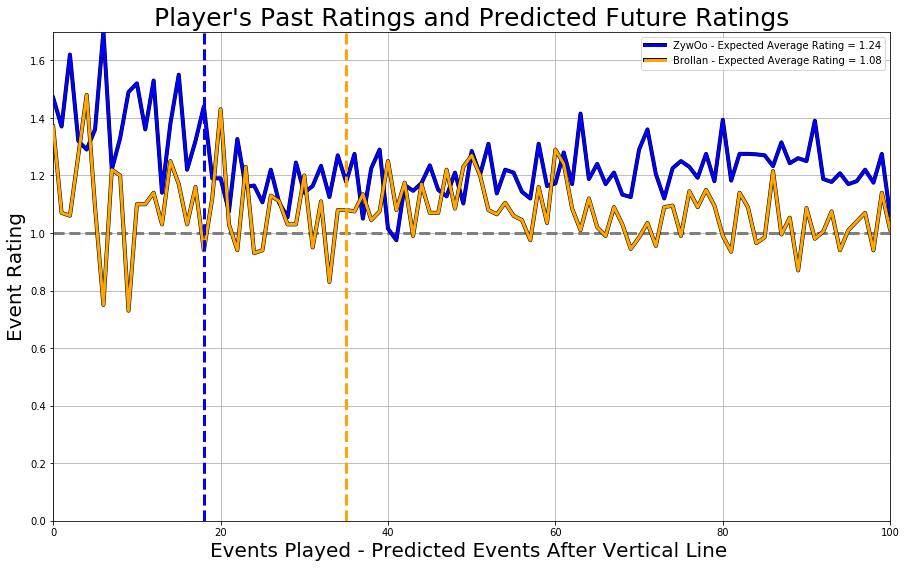

In [23]:
plt.figure(figsize=(16,8))
dfPredict.plot.line(zorder=3, figsize=(15,9),linewidth=3, linestyle='-', color = ['b','orange'], path_effects=[pe.Stroke(linewidth=4, foreground='black'), pe.Normal()])
plt.legend(('ZywOo - Expected Average Rating = 1.24','Brollan - Expected Average Rating = 1.08'))
plt.xlabel('Events Played - Predicted Events After Vertical Line ', fontsize=20)
plt.ylabel("Event Rating", fontsize=20)
plt.grid(True)
plt.ylim(0, 1.7)
plt.xlim(0, 100)
xcoords = [18, 35]
plt.axhline(y=1, color='grey', linestyle='--', linewidth=3)
color = ['blue','orange']

for xc,c in zip(xcoords,color):
    plt.axvline(x=xc, zorder=3, c=c, linestyle='--', linewidth=3)

    
plt.title("Player's Past Ratings and Predicted Future Ratings", fontsize=25)

A simialar line graph was made, using the last 3 players to predict their future ratings.

Text(0.5, 1.0, "Player's Past Ratings and Predicted Future Ratings")

<Figure size 1152x576 with 0 Axes>

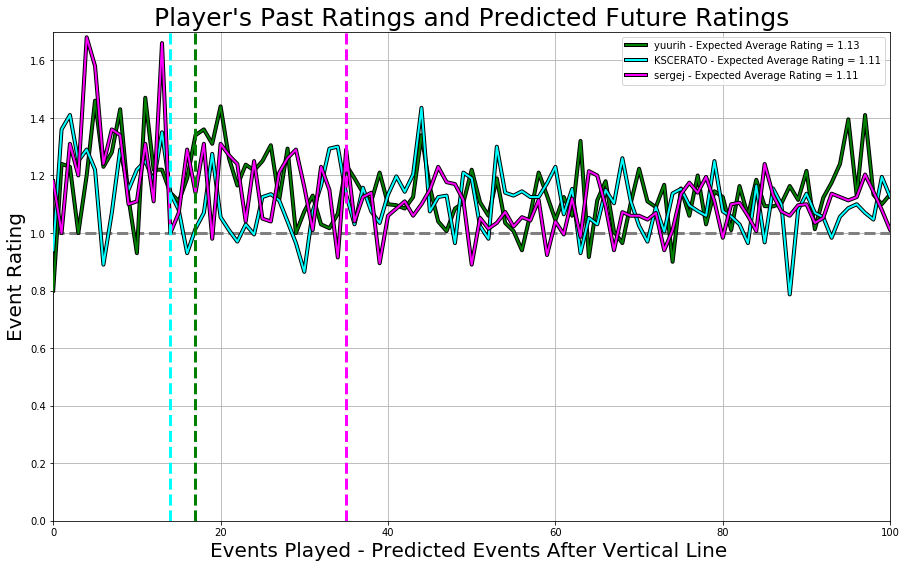

In [24]:
plt.figure(figsize=(16,8))
dfPredict2.plot.line(zorder=3, figsize=(15,9),linewidth=2, linestyle='-', color = ['g','cyan', 'magenta'], path_effects=[pe.Stroke(linewidth=4, foreground='black'), pe.Normal()])
plt.legend(('yuurih - Expected Average Rating = 1.13','KSCERATO - Expected Average Rating = 1.11',
            'sergej - Expected Average Rating = 1.11'))
plt.xlabel('Events Played - Predicted Events After Vertical Line ', fontsize=20)
plt.ylabel("Event Rating", fontsize=20)
plt.grid(True)
plt.ylim(0, 1.7)
plt.xlim(0, 100)
xcoords = [17, 14, 35]
plt.axhline(y=1, color='grey', linestyle='--', linewidth=3)
color = ['g','cyan','magenta']

for xc,c in zip(xcoords,color):
    plt.axvline(x=xc, zorder=3, c=c, linestyle='--', linewidth=3)

    
plt.title("Player's Past Ratings and Predicted Future Ratings", fontsize=25)